In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
dataset = load_digits()

In [55]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [56]:
dataset['data'].shape
#dataset['data'][0]

(1797, 64)

In [57]:
dataset['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
dataset['images'].shape

(1797, 8, 8)

In [59]:
dataset['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

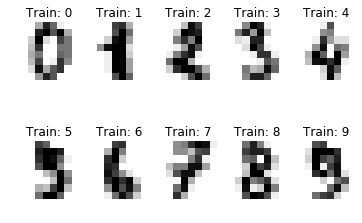

In [60]:
images_and_labels = list(zip(dataset.images, dataset.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Train: %i'% label)
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [64]:
knn.score(x_test, y_test)

0.9733333333333334

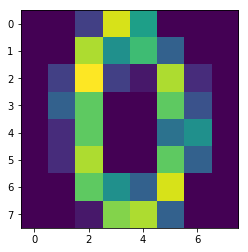

In [66]:
plt.imshow(x_test[0].reshape(8,8))

[7]
7


<function matplotlib.pyplot.show(*args, **kw)>

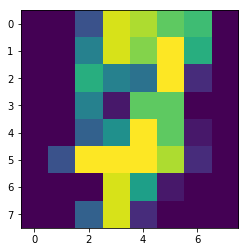

In [69]:
i= 9
print(knn.predict(x_test[i].reshape(1,-1)))
print(y_test[i])
plt.imshow(x_test[i].reshape(8,8))
plt.show

In [48]:
x_new = np.array([[2,9,0.1,7.8,9,5,4,3,5,6,7,8,2,5,3,5,6,7,4,6,7,8,6,5,5,3,2,1,3,4,4,5,6,9,9,7,6,7,6,7,6,7,4,3,2,3,5,6,7,7,4,6,4,4,4,4,4,4,4,4,3,2,2,2]])
x_new = x_new.reshape(1,-1)
print("x_new.shape: {}".format(x_new.shape))

x_new.shape: (1, 64)


In [49]:
prediction = knn.predict(x_new)
print(prediction)

[0]


In [52]:
y_pred = knn.predict(x_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
 [5 4 1 3 2 3 0 3 4 8 4 4 4 8 9 6 9 6 9 7 3 9 1 2 8 2 0 3 3 2 6 5 5 6 2 1 1
 3 3 7 5 7 5 0 9 5 9 6 4 3 4 8 3 7 6 2 8 0 5 5 9 6 7 2 2 9 8 0 1 0 5 5 8 2
 5 6 7 8 8 7 1 8 6 5 4 2 4 6 9 7 0 3 7 6 2 3 8 1 2 4 7 4 4 4 2 8 5 3 3 6 3
 3 4 0 2 9 1 2 6 8 3 1 4 3 3 5 6 9 2 8 1 2 8 8 1 3 5 5 0 7 1 1 8 8 2 2 3 5
 4 6 4 4 4 7 3 5 6 3 5 3 4 1 0 4 9 0 8 7 2 3 9 5 4 2 7 8 7 1 0 1 9 6 8 4 9
 1 5 0 5 4 7 2 2 6 7 2 9 1 5 2 5 6 4 8 1 9 6 3 7 0 4 8 4 3 0 9 7 5 8 5 6 9
 7 4 9 6 7 1 6 9 6 6 7 1 3 7 0 0 9 2 6 2 1 4 1 0 4 1 5 0 4 5 6 0 4 1 0 7 5
 8 9 1 5 4 6 9 1 2 4 6 5 8 1 8 2 8 3 4 5 0 6 8 6 7 0 9 9 0 8 2 0 5 2 4 2 2
 6 8 0 3 7 2 3 2 0 9 4 6 4 1 0 9 4 5 1 5 1 9 0 8 5 8 8 6 1 3 1 2 0 3 1 5 0
 4 5 3 2 3 0 9 5 1 8 6 2 1 7 3 0 7 9 6 8 6 3 9 8 5 7 6 4 0 3 9 8 7 0 1 6 3
 8 7 9 4 3 3 3 0 8 8 7 1 0 9 7 6 0 9 4 0 8 5 2 2 3 6 8 1 9 3 8 8 3 4 4 1 9
 6 7 6 0 7 5 4 9 4 7 6 5 3 2 2 1 2 4 2 4 4 3 6 6 4 2 9 3 8 1 3 2 8 8 8 8 0
 1 9 3 4 1 5]
Test set score: 0.98
